In [1]:
## Lending Club Case Study

In [2]:
#Load the package and suppress the warnings
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
LoanSourceFile=pd.read_csv('loan.csv',low_memory=False)
LoanSourceFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [3]:
## Identify the Null values Column 
loanApprovedDS = LoanSourceFile[LoanSourceFile["loan_status"]!='Current']
loanApprovedDS = loanApprovedDS[loanApprovedDS["annual_inc"] < loanApprovedDS["annual_inc"].quantile(0.95)]
loanApprovedDS.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        30
tot_hi_cred_lim               36642
total_bal_ex_mort             36642
total_bc_limit                36642
total_il_high_credit_limit    36642
Length: 111, dtype: int64

In [4]:
## Identify the shape of the Dataset
loanApprovedDS.shape

(36642, 111)

In [5]:
## Identify the required Column
#90% null value in the column are dropped and hold only thr column which has the limited empty value
LoanApprovedNotNull = (loanApprovedDS.isna().sum()/loanApprovedDS.shape[0])*100
LoanApprovedNotNull

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.081873
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [6]:
LoanExcludecolumnList=LoanApprovedNotNull[LoanApprovedNotNull>90].index.tolist()
loanApprovedDS.drop(columns=LoanExcludecolumnList, inplace = True)
loanApprovedDS.shape

(36642, 55)

In [7]:
#removed the unwanted columns

In [8]:
loanApprovedDS.shape

(36642, 55)

In [9]:
#Identify the 90% null value in row and drop them if exist
LoanApprovedRowNull = (loanApprovedDS.isna().sum(axis=1)/loanApprovedDS.shape[1])*100
LoanApprovedRowNull=LoanApprovedRowNull[LoanApprovedRowNull>90]

LoanExcludeRowList=LoanApprovedRowNull[LoanApprovedRowNull>90].tolist()
loanApprovedDS.drop(LoanExcludeRowList, inplace = True)
LoanExcludeRowList

[]

In [10]:
loanApprovedDS.shape

(36642, 55)

In [11]:
# Remove the columns which is not driving factor and more than 1 unique value
remove_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
"total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
"last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","pymnt_plan", "initial_list_status", "collections_12_mths_ex_med",
"policy_code", "application_type", "acc_now_delinq","chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]
loanApprovedDS.drop(columns=remove_cols, inplace=True)
loanApprovedDS.shape

(36642, 30)

In [12]:
# Set Employee length to zero if it's null and set the pub_rec_bankruptcies to not available if it's null
loanApprovedDS.emp_length.fillna('0',inplace=True)
loanApprovedDS.pub_rec_bankruptcies.fillna(0,inplace=True)
#loanApprovedDS.annual_inc.fillna('0',inplace=True)

In [13]:
# Remove % from int_rate and revol_utilfor further analysis
loanApprovedDS['int_rate'] = loanApprovedDS['int_rate'].str.strip('%')
loanApprovedDS['revol_util'] = loanApprovedDS['revol_util'].str.strip('%')
loanApprovedDS.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,Jan-85,1,NaN,3,0,13648,83.70,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,Apr-99,5,NaN,3,0,1687,9.40,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,Nov-01,2,NaN,2,0,2956,98.50,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,Feb-96,1,35.0,10,0,5598,21,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0,Nov-04,3,NaN,9,0,7963,28.30,12,0.0


<AxesSubplot:>

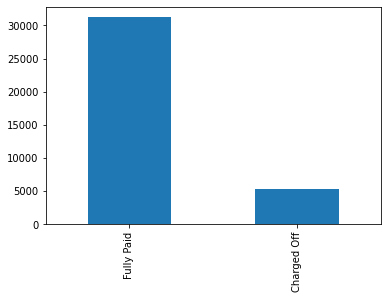

In [14]:
#Univeriant analysis based on loan status attribute
loanApprovedDS.loan_status.value_counts().plot(kind='bar')

<AxesSubplot:>

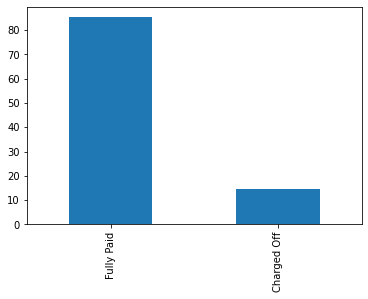

In [15]:
#Univerient Analysis
# Percentage of loan status is fully paod vs Charged Off
loanstatus=(loanApprovedDS.loan_status.value_counts()*100)/len(loanApprovedDS)
loanstatus.plot(kind='bar')

<AxesSubplot:>

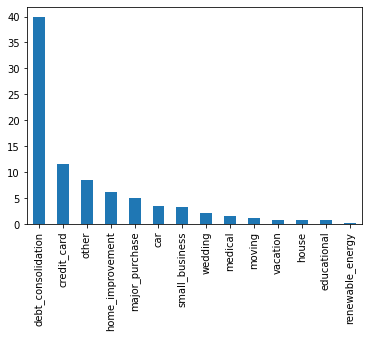

In [16]:
#Loan Based on Category
loancategory=(loanApprovedDS[loanApprovedDS["loan_status"]=="Fully Paid"].purpose.value_counts()*100)/len(loanApprovedDS)
loancategory.plot(kind='bar')

<AxesSubplot:>

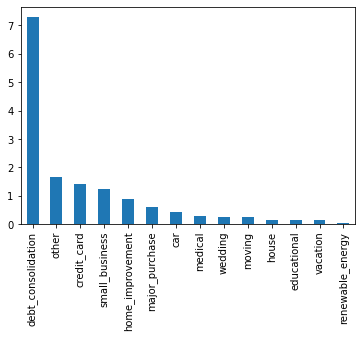

In [17]:
#Loan Based on Category - Charged Off
loancategory=(loanApprovedDS[loanApprovedDS["loan_status"]=="Charged Off"].purpose.value_counts()*100)/len(loanApprovedDS)
loancategory.plot(kind='bar')

In [18]:
loanApprovedDS.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,12924.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000
mean,10681.045658,10435.008324,9892.999247,311.863566,60829.831120,13.447256,0.144916,0.863927,35.991334,9.166366,0.056847,12307.235249,21.637656,0.043911
std,7047.619569,6799.747627,6730.054355,199.215000,27717.831464,6.661561,0.489749,1.064108,22.021570,4.352874,0.240345,13755.413536,11.231134,0.205566
min,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,163.080000,40000.000000,8.350000,0.000000,0.000000,18.000000,6.000000,0.000000,3554.000000,13.000000,0.000000
50%,9250.000000,9000.000000,8375.000000,270.410000,56000.000000,13.580000,0.000000,1.000000,34.000000,8.000000,0.000000,8497.000000,20.000000,0.000000
75%,15000.000000,14400.000000,13618.409453,408.480000,77704.050000,18.717500,0.000000,1.000000,52.000000,12.000000,0.000000,16149.000000,28.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,140000.000000,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149000.000000,90.000000,2.000000


<AxesSubplot:xlabel='purpose'>

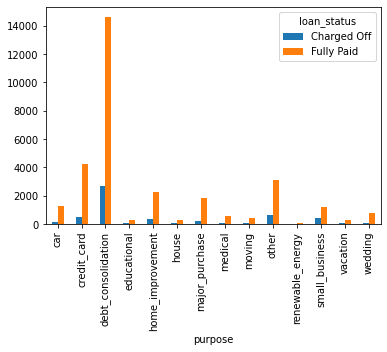

In [19]:
loanApprovedDS.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')
#Small business has higher charged off ratio

<AxesSubplot:xlabel='emp_length'>

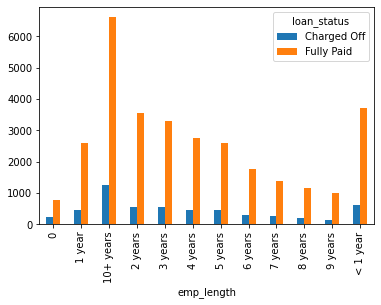

In [20]:
loanApprovedDS.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar')
#No conclusion based on employee length

In [49]:
lst=loanApprovedDS.groupby('int_rate')['loan_status'].value_counts().unstack()#.plot(kind='bar',figsize=(20,3))
lst.tail(20)
#Higher the intrest rate and higher the charged off

loan_status,Charged Off,Fully Paid
int_rate,,
21.59,2.0,3.0
21.64,1.0,1.0
21.67,12.0,20.0
21.74,16.0,9.0
21.82,1.0,1.0
22.06,10.0,14.0
22.11,9.0,14.0
22.35,11.0,7.0
22.48,6.0,7.0


<AxesSubplot:xlabel='grade'>

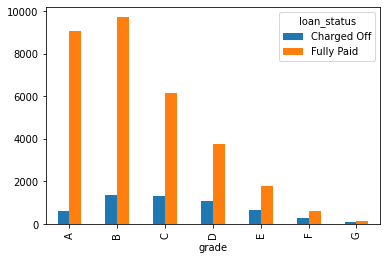

In [22]:
loanApprovedDS.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')
#Grade D and E has high charged-off ratio

<AxesSubplot:xlabel='term'>

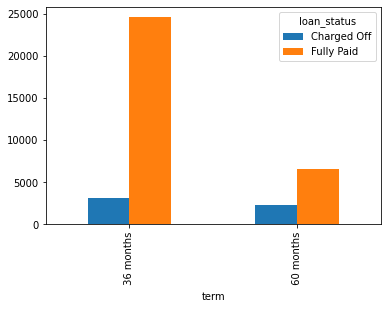

In [23]:
loanApprovedDS.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar')
#60 Months payments loans has high impat of charged-off

<AxesSubplot:xlabel='home_ownership'>

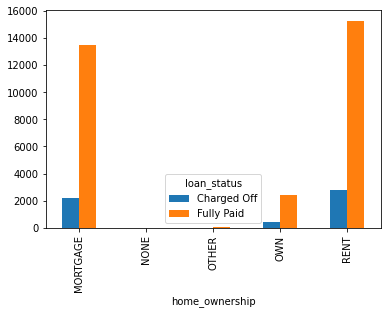

In [77]:
loanApprovedDS.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar')
#No conclusion on this plot.

<AxesSubplot:xlabel='verification_status'>

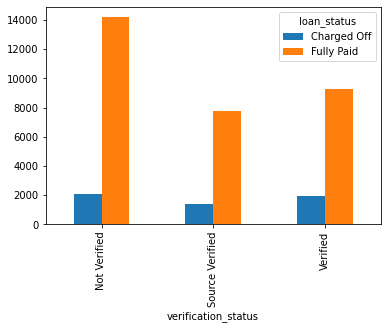

In [25]:
loanApprovedDS.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar')
#No Conclusion based on verification status

In [26]:
#loanApprovedDS.groupby('title')['loan_status'].value_counts().unstack().plot(kind='bar')

In [27]:
#pd.cut(temp.cont,3).value_counts()
#pd.cut(loanApprovedDS.int_rate,3)
loanApprovedDS.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
desc                       object
purpose                    object
title                      object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
pub_rec_bankru

In [28]:
loanApprovedDS['int_rate'] = loanApprovedDS['int_rate'].astype(float)

<AxesSubplot:xlabel='Intrest_bin'>

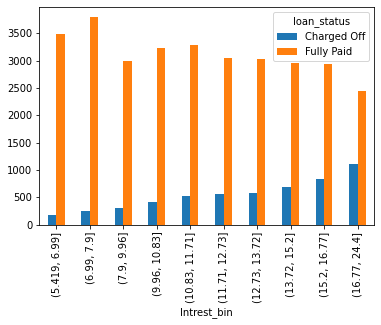

In [78]:
loanApprovedDS['Intrest_bin']= pd.qcut(loanApprovedDS.int_rate,q=10)
loanApprovedDS.groupby('Intrest_bin')['loan_status'].value_counts().unstack().plot(kind='bar')

#Higher the intrest rate and Higher charged off

<AxesSubplot:xlabel='loan_amnt_bin'>

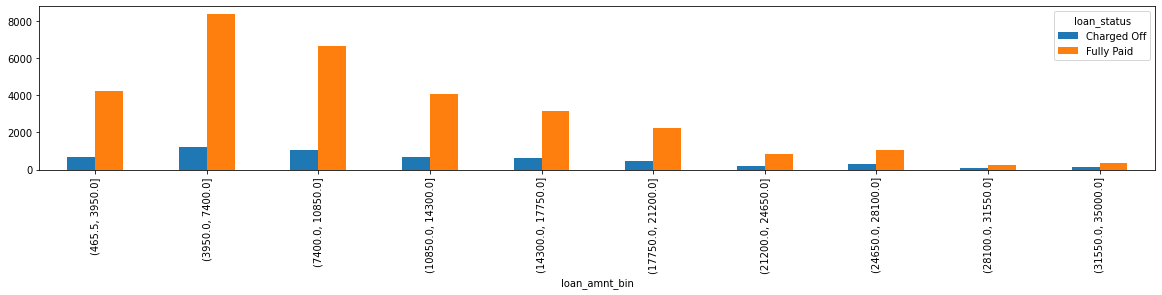

In [80]:
#loanApprovedDS['annual_inc'] = loanApprovedDS['annual_inc'].astype('uint8')
loanApprovedDS['loan_amnt'] = loanApprovedDS['loan_amnt'].apply(pd.to_numeric).astype(float)
loanApprovedDS['loan_amnt_bin']= pd.cut(loanApprovedDS.loan_amnt,10)
#loanApprovedDS.head()
loanApprovedDS.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,3))
#Higher the loan amount and higher the charged off

<AxesSubplot:xlabel='annual_inc_bin'>

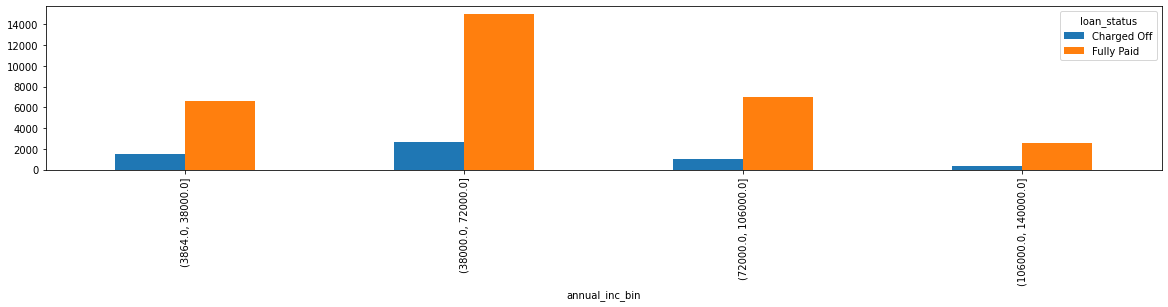

In [31]:
loanApprovedDS['annual_inc'] = loanApprovedDS['annual_inc'].apply(pd.to_numeric)
loanApprovedDS['annual_inc_bin']= pd.cut(loanApprovedDS.annual_inc,4)
#loanApprovedDS.head()
loanApprovedDS.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,3))
#No Conclusion

In [32]:
loanApprovedDS['annual_inc'].isnull().value_counts()

False    36642
Name: annual_inc, dtype: int64

<AxesSubplot:xlabel='pub_rec_bankruptcies'>

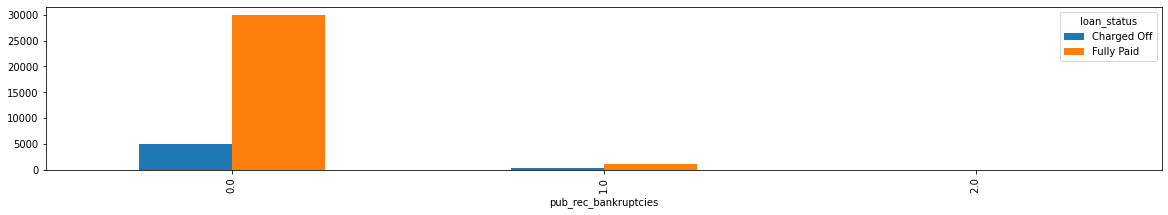

In [85]:
#loanApprovedDS['pub_rec_bankruptcies'] = loanApprovedDS['pub_rec_bankruptcies'].apply(pd.to_numeric)
#loanApprovedDS['pub_rec_bankruptcies_bin']= pd.cut(loanApprovedDS.pub_rec_bankruptcies,3)
#loanApprovedDS.head()
loanApprovedDS.groupby('pub_rec_bankruptcies')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,3))
#pub_rec_bankruptcies=1 has a high charged-off

<AxesSubplot:xlabel='month'>

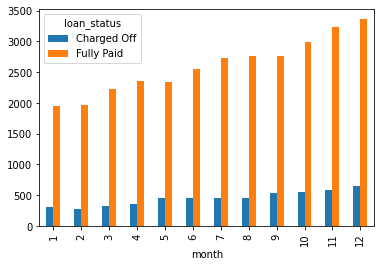

In [50]:
loanApprovedDS['issue_d'] = pd.to_datetime(loanApprovedDS.issue_d, format='%b-%y')
loanApprovedDS['year']=loanApprovedDS['issue_d'].dt.year
loanApprovedDS['month']=loanApprovedDS['issue_d'].dt.month
loanApprovedDS.groupby('month')['loan_status'].value_counts().unstack().plot(kind='bar')
#More charged-off is happening on Sep,Oct,Nov and Dec

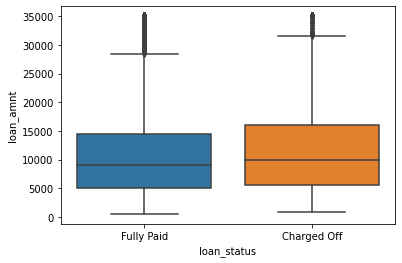

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loanApprovedDS)
plt.show()
#Higher the loan amount has a risk

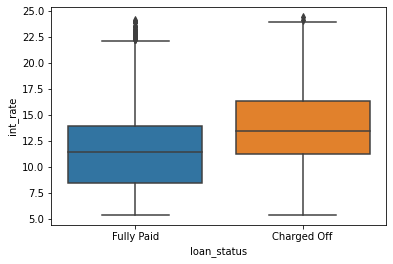

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'loan_status', y = 'int_rate', data = loanApprovedDS)
plt.show()

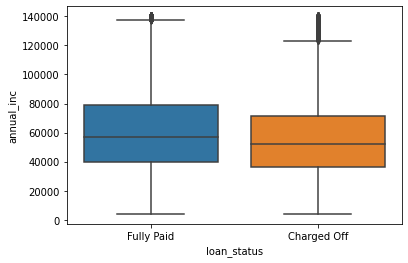

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = loanApprovedDS)
plt.show()
#No Conclusion

In [38]:
## Bi-Variate Analysis
#loanApprovedDS.groupby['loan_status','emp_length'].value_counts().unstack().plot(kind='bar',figsize=(20,3))
loanApprovedDS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36642 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 36642 non-null  float64       
 1   funded_amnt               36642 non-null  int64         
 2   funded_amnt_inv           36642 non-null  float64       
 3   term                      36642 non-null  object        
 4   int_rate                  36642 non-null  float64       
 5   installment               36642 non-null  float64       
 6   grade                     36642 non-null  object        
 7   sub_grade                 36642 non-null  object        
 8   emp_title                 34439 non-null  object        
 9   emp_length                36642 non-null  object        
 10  home_ownership            36642 non-null  object        
 11  annual_inc                36642 non-null  float64       
 12  verification_statu

<AxesSubplot:xlabel='int_rate', ylabel='loan_amnt'>

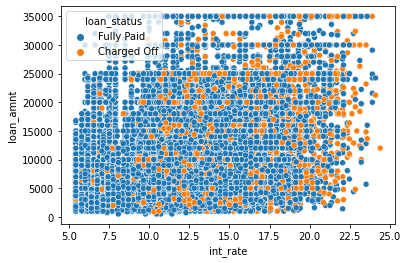

In [39]:
sns.scatterplot(x=loanApprovedDS["int_rate"],y=loanApprovedDS["loan_amnt"],hue=loanApprovedDS["loan_status"])
#higher intrest rate and loan amount has higher charged off

<AxesSubplot:xlabel='month', ylabel='loan_amnt'>

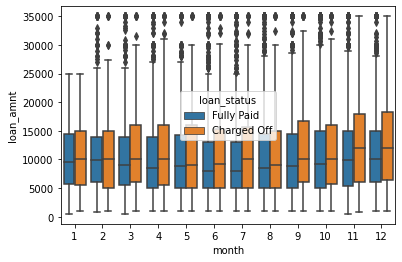

In [40]:
sns.boxplot(x=loanApprovedDS["month"],y=loanApprovedDS["loan_amnt"],hue=loanApprovedDS["loan_status"])

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

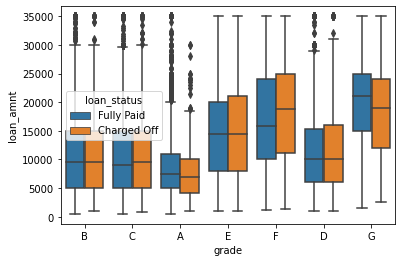

In [41]:
sns.boxplot(x=loanApprovedDS["grade"],y=loanApprovedDS["loan_amnt"],hue=loanApprovedDS["loan_status"])
#D,E and F grade has high charged-off

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

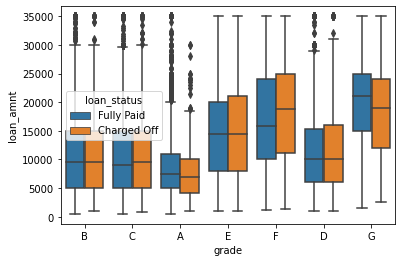

In [42]:
sns.boxplot(x=loanApprovedDS["grade"],y=loanApprovedDS["loan_amnt"],hue=loanApprovedDS["loan_status"])

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

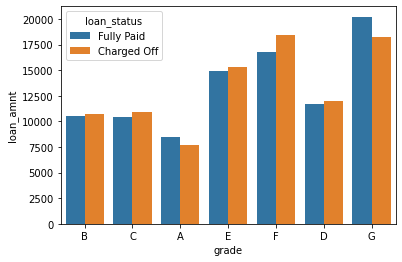

In [43]:
sns.barplot(x=loanApprovedDS["grade"],y=loanApprovedDS["loan_amnt"],hue=loanApprovedDS["loan_status"],ci=None)

<AxesSubplot:>

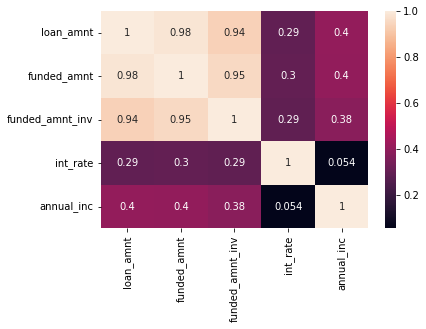

In [44]:
#Identify the correlation for the continuous Column
cont_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc']
sns.heatmap(loanApprovedDS[cont_cols].corr(),annot=True)

In [45]:
#Identify the Mean,median value from Continuous column
loanApprovedDS[cont_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc
count,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000
mean,10681.045658,10435.008324,9892.999247,11.887884,60829.831120
std,7047.619569,6799.747627,6730.054355,3.667161,27717.831464
min,500.000000,500.000000,0.000000,5.420000,4000.000000
25%,5000.000000,5000.000000,4975.000000,8.940000,40000.000000
50%,9250.000000,9000.000000,8375.000000,11.710000,56000.000000
75%,15000.000000,14400.000000,13618.409453,14.270000,77704.050000
max,35000.000000,35000.000000,35000.000000,24.400000,140000.000000


<AxesSubplot:xlabel='term'>

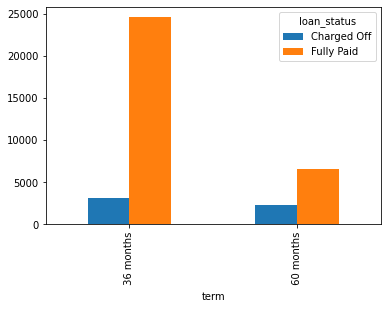

In [53]:
#loanApprovedDS.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar')


<AxesSubplot:xlabel='addr_state'>

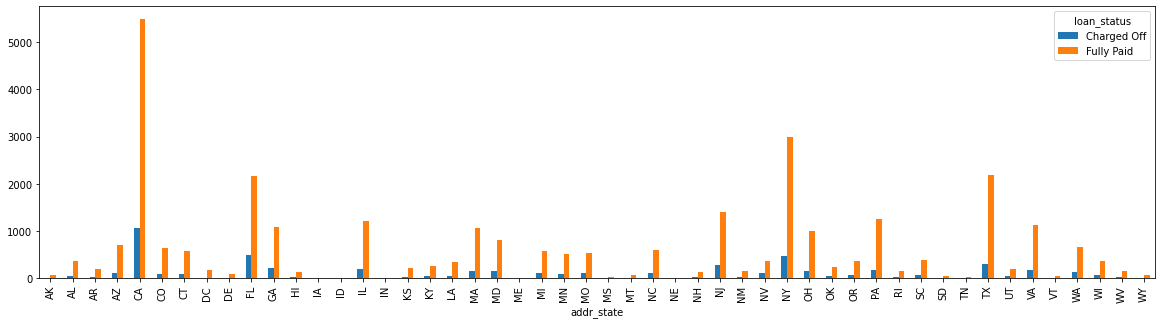

In [58]:
#loanApprovedDS.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar')
loanApprovedDS.groupby('addr_state')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

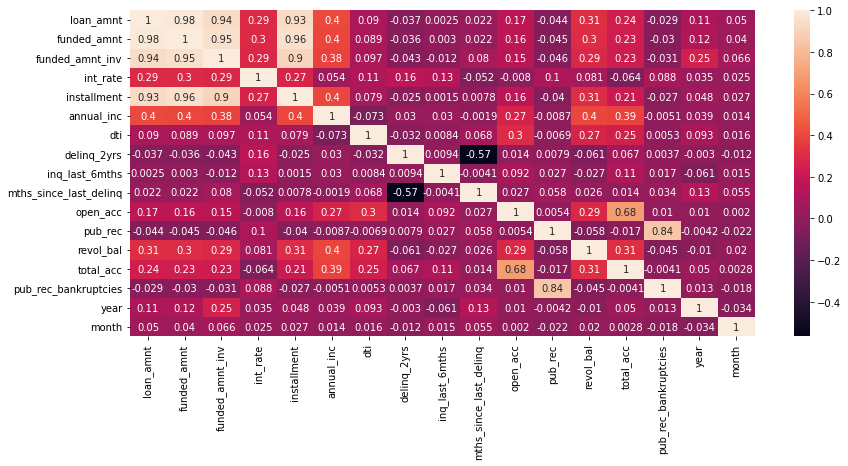

In [61]:
# Correlation is created based on the loan spreadsheet
plt.figure(figsize=(14,6))
sns.heatmap(loanApprovedDS.corr(),annot=True)

c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_amnt_cat', ylabel='count'>

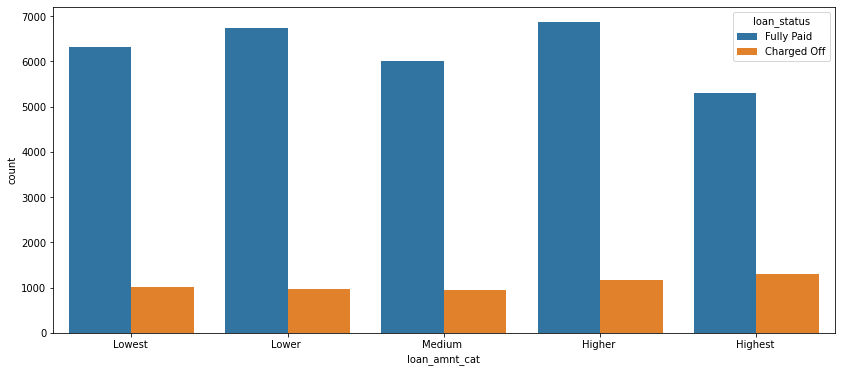

In [66]:
loanApprovedDS["loan_amnt_cat"] = pd.qcut(loanApprovedDS['loan_amnt'], q=5, labels=['Lowest ','Lower ','Medium ','Higher ','Highest '])
plt.figure(figsize=(14,6))
sns.countplot(loanApprovedDS["loan_amnt_cat"], hue=loanApprovedDS['loan_status'])

In [70]:
pd.cut(loanApprovedDS['loan_amnt'],5)

0          (465.5, 7400.0]
1          (465.5, 7400.0]
2          (465.5, 7400.0]
3        (7400.0, 14300.0]
5          (465.5, 7400.0]
               ...        
39711      (465.5, 7400.0]
39712      (465.5, 7400.0]
39713    (7400.0, 14300.0]
39714      (465.5, 7400.0]
39716    (7400.0, 14300.0]
Name: loan_amnt, Length: 36642, dtype: category
Categories (5, interval[float64]): [(465.5, 7400.0] < (7400.0, 14300.0] < (14300.0, 21200.0] < (21200.0, 28100.0] < (28100.0, 35000.0]]

In [86]:
#Lowest,Lower, Median .Higher and Highest loan amount categories
pd.qcut(loanApprovedDS['loan_amnt'],q=5)

0         (4950.0, 7500.0]
1        (499.999, 4950.0]
2        (499.999, 4950.0]
3        (7500.0, 10500.0]
5         (4950.0, 7500.0]
               ...        
39711     (4950.0, 7500.0]
39712    (499.999, 4950.0]
39713    (7500.0, 10500.0]
39714     (4950.0, 7500.0]
39716     (4950.0, 7500.0]
Name: loan_amnt, Length: 36642, dtype: category
Categories (5, interval[float64]): [(499.999, 4950.0] < (4950.0, 7500.0] < (7500.0, 10500.0] < (10500.0, 16000.0] < (16000.0, 35000.0]]

loan_status         Charged Off  Fully Paid
installment_bin                            
(15.689, 97.85]             553        3113
(97.85, 145.19]             518        3147
(145.19, 182.42]            504        3160
(182.42, 222.21]            467        3196
(222.21, 270.41]            495        3170
(270.41, 320.95]            507        3157
(320.95, 374.97]            553        3111
(374.97, 463.086]           566        3096
(463.086, 588.985]          607        3057
(588.985, 1305.19]          646        3019


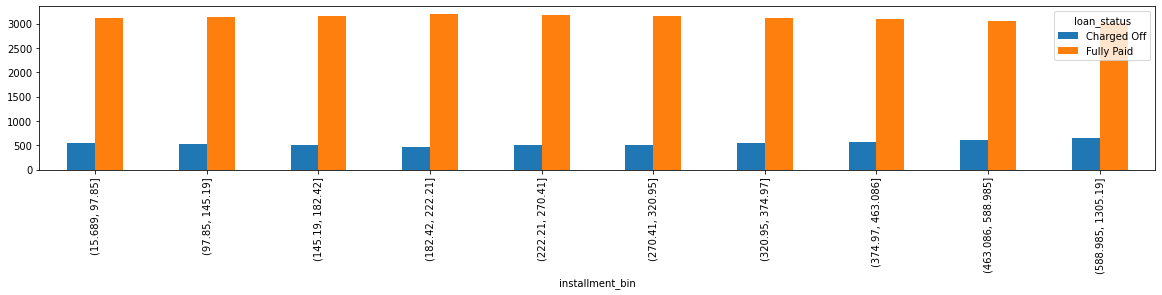

In [91]:
loanApprovedDS['installment'] = loanApprovedDS['installment'].apply(pd.to_numeric).astype(float)
loanApprovedDS['installment_bin']= pd.qcut(loanApprovedDS.installment,q=10)
#loanApprovedDS.head()
loanApprovedDS.groupby('installment_bin')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,3))
print(loanApprovedDS.groupby('installment_bin')['loan_status'].value_counts().unstack().tail(10))
#Higher installments has more risk of charged off

In [92]:
####Observations
#01.Higher the Intrest rate and higher the loan amount is causing the Higher charged off
#02.Higher Charged off is happening between Sep, Oct, Nov and Dec Month - It based on loan issued date
#03.Small Business purpose loan has high impact on Charged Off
#04.60 Months payments loans has high impat of charged-off
#05.lowest income range is the more risky when it comes to loan repayment.
#06.Higher installments has more risk of charged off.

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

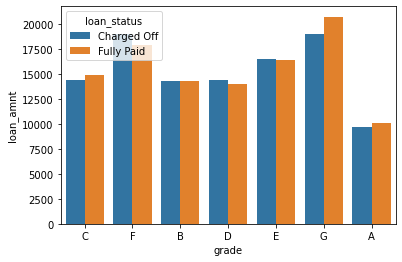

In [107]:
loanApprovedDS2=loanApprovedDS[loanApprovedDS['term']==' 60 months']
loanApprovedDS2.head()
sns.barplot(x=loanApprovedDS2["grade"],y=loanApprovedDS2["loan_amnt"],hue=loanApprovedDS2["loan_status"],ci=None)

<AxesSubplot:xlabel='emp_length'>

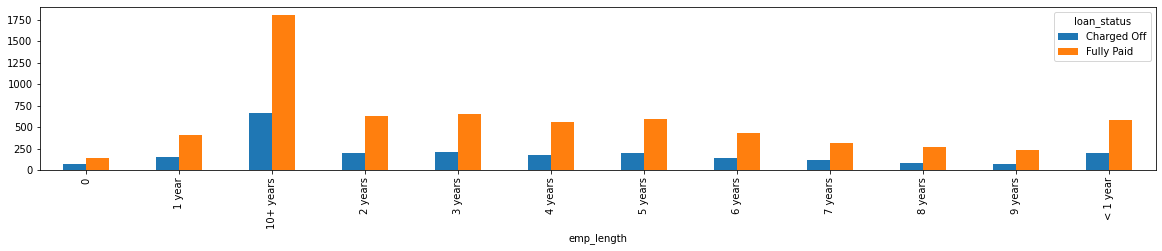

In [117]:
#sns.barplot(x=loanApprovedDS2["emp_length"],y=loanApprovedDS2["loan_amnt"],hue=loanApprovedDS2["loan_status"],ci=None)
loanApprovedDS2.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,3))

<AxesSubplot:xlabel='purpose'>

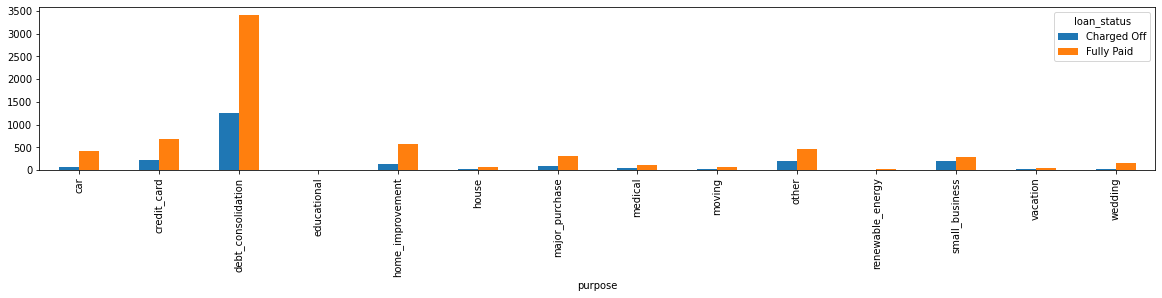

In [118]:
loanApprovedDS2.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(20,3))